In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the CSV file
data = pd.read_csv(r'merged_results.csv')

# Display the first few rows of the dataframe to understand its structure
data.head()
# Data preprocessing
# Drop the Filename column as it's not useful for prediction
data = data.drop(columns=['Filename'])
data = pd.get_dummies(data)
# for col in data.columns:  
#     if data[col].dtype == 'object':  
#         le = LabelEncoder()  
#         data[col] = le.fit_transform(data[col])


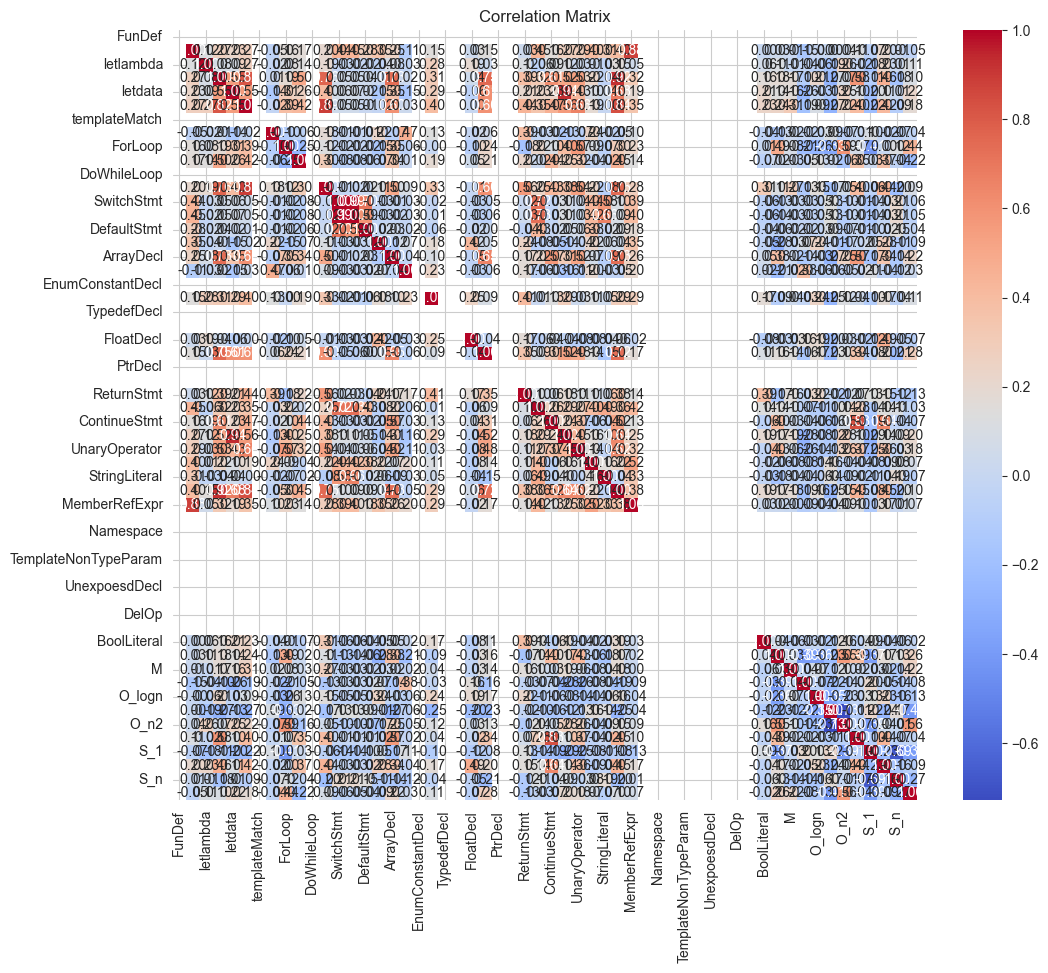

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [10]:
# Select the top 15 features that have the highest correlation with Time
top_features = corr_matrix['Time'].abs().sort_values(ascending=False).index[1:16]
top_features

Index(['O_n2', 'ForLoop', 'UnaryOperator', 'ContinueStmt', 'O_n3', 'O_1',
       'ArrayDecl', 'S_1', 'O_logn', 'TernaryOp', 'S_n2', 'closure', 'O_n',
       'FieldDecl', 'StringLiteral'],
      dtype='object')

In [11]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Select the data with these features
# X = data[top_features]
X = data.drop(columns=['Time'])
y = data['Time']

# Log transform the target variable
y_log = np.log(y + 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Lasso model
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred_log = lasso.predict(X_test)
y_pred = np.exp(y_pred_log) - 1

# Evaluate the model
mse = mean_squared_error(np.exp(y_test) - 1, y_pred)
r2 = r2_score(np.exp(y_test) - 1, y_pred)

print(f'MSE: {mse}, R^2: {r2}')

MSE: 2.6781967776023494e-09, R^2: 0.5757515385227516


In [12]:
from sklearn.decomposition import PCA

# Apply PCA to the data
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the Lasso model on the PCA transformed data
lasso_pca = LassoCV(cv=5, random_state=42)
lasso_pca.fit(X_train_pca, y_train)

# Predict on the test set
y_pred_log_pca = lasso_pca.predict(X_test_pca)
y_pred_pca = np.exp(y_pred_log_pca) - 1

# Evaluate the model
mse_pca = mean_squared_error(np.exp(y_test) - 1, y_pred_pca)
r2_pca = r2_score(np.exp(y_test) - 1, y_pred_pca)

print(f'MSE with PCA: {mse_pca}, R^2 with PCA: {r2_pca}')


MSE with PCA: 4.1361230748399585e-09, R^2 with PCA: 0.34480398690034675


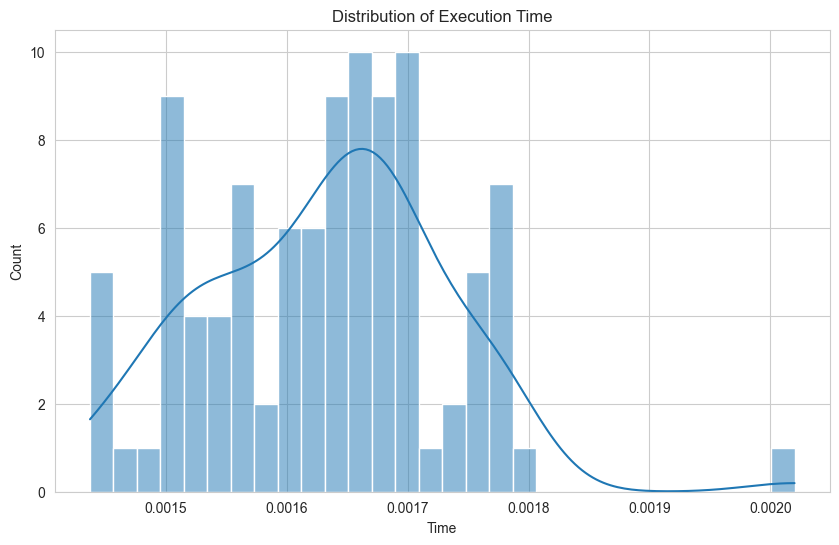

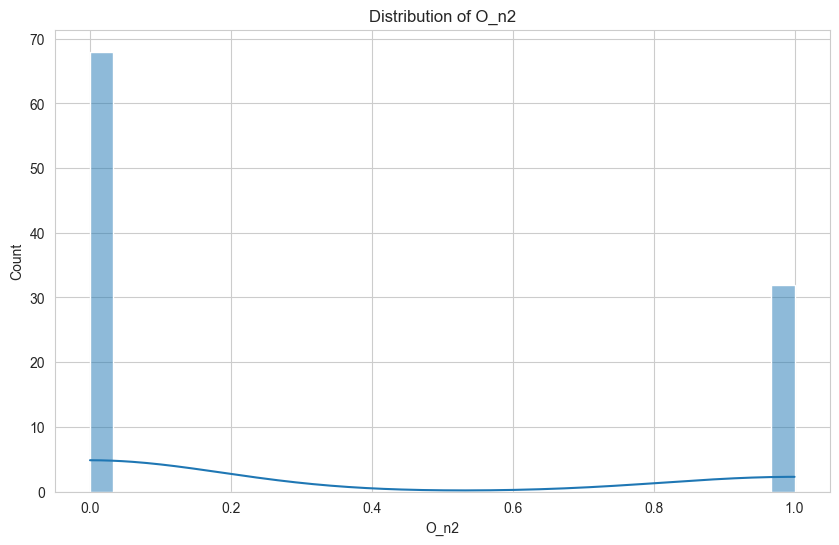

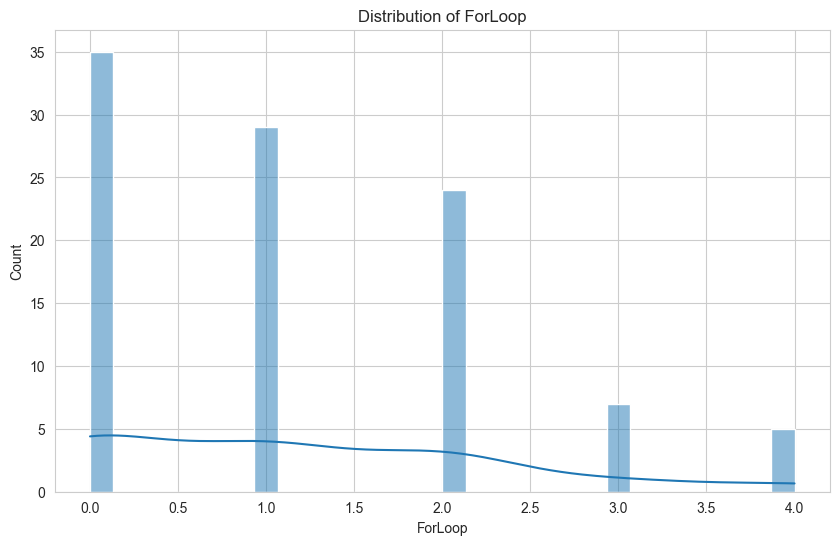

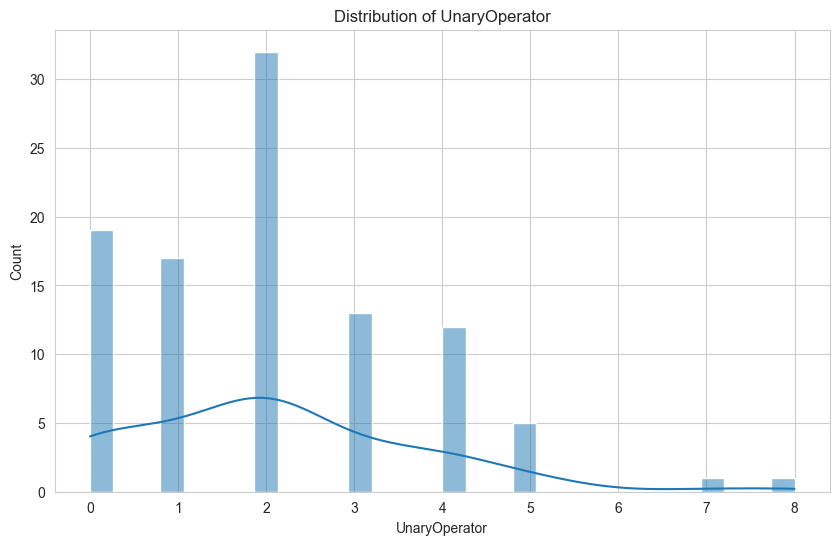

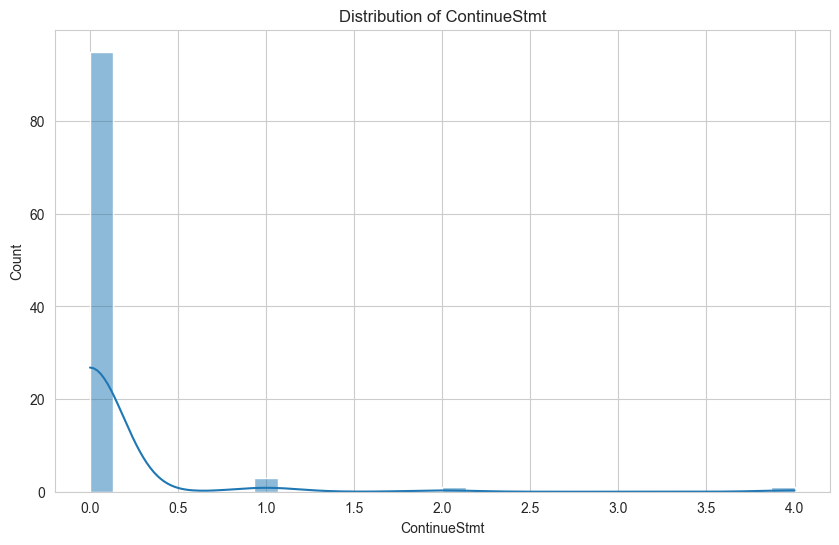

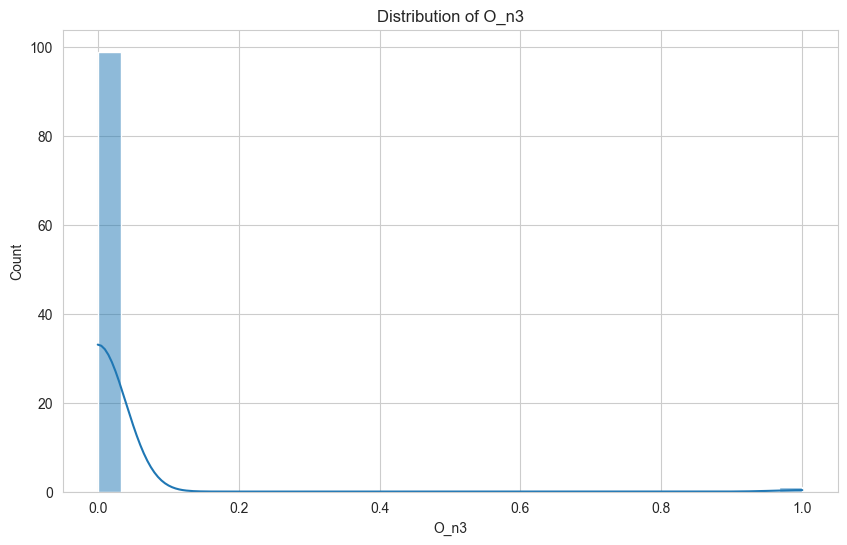

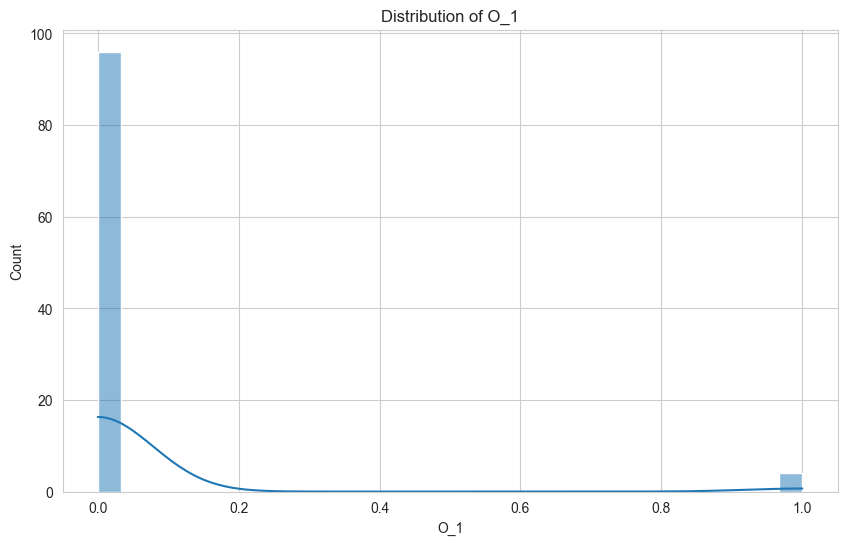

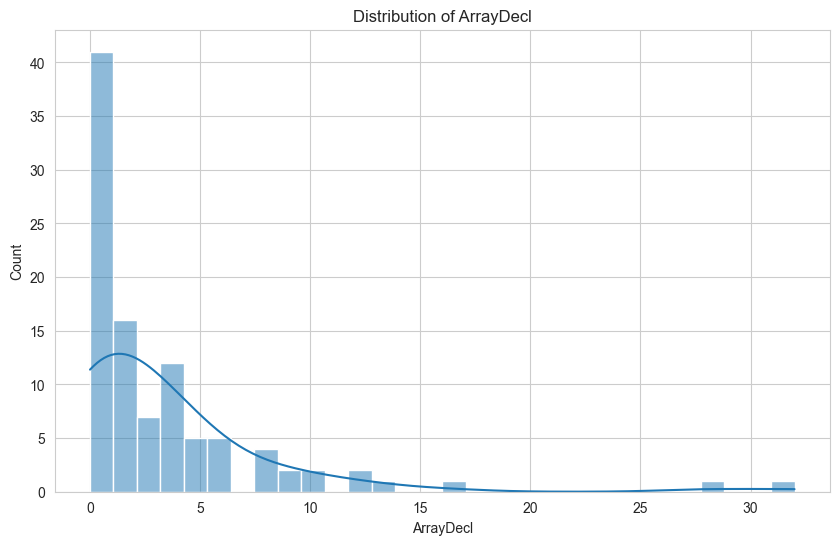

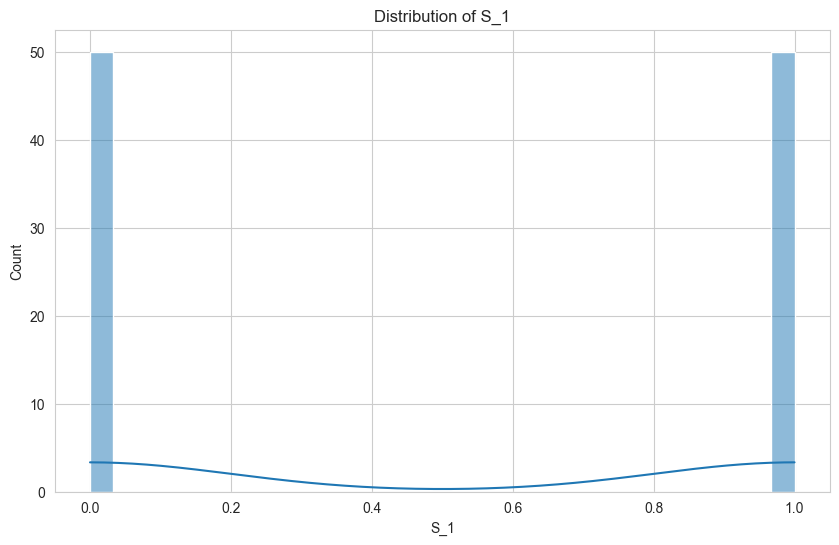

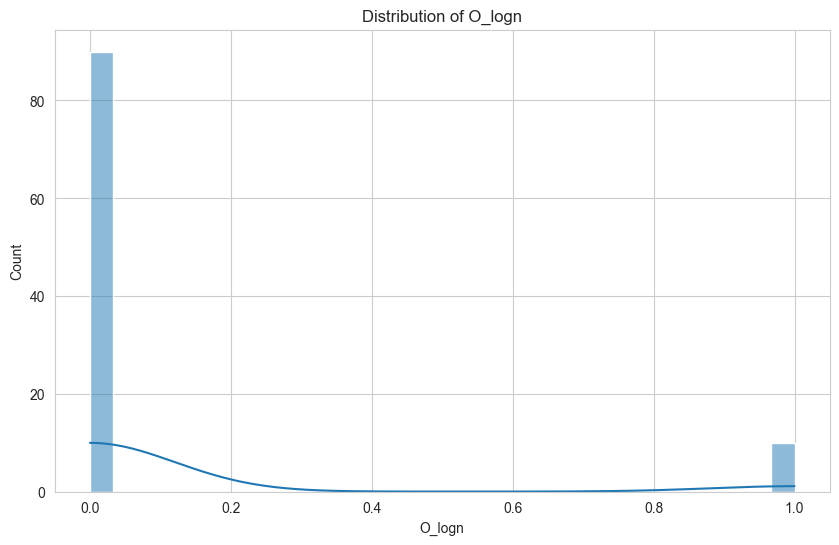

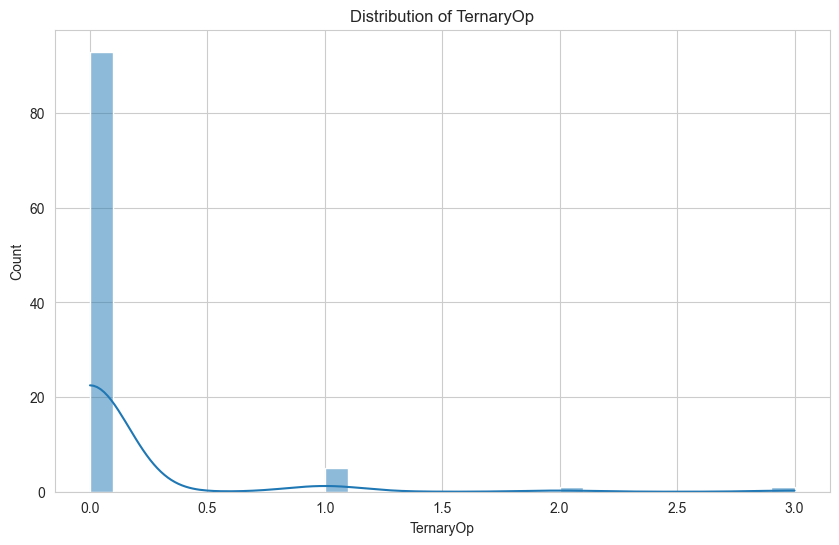

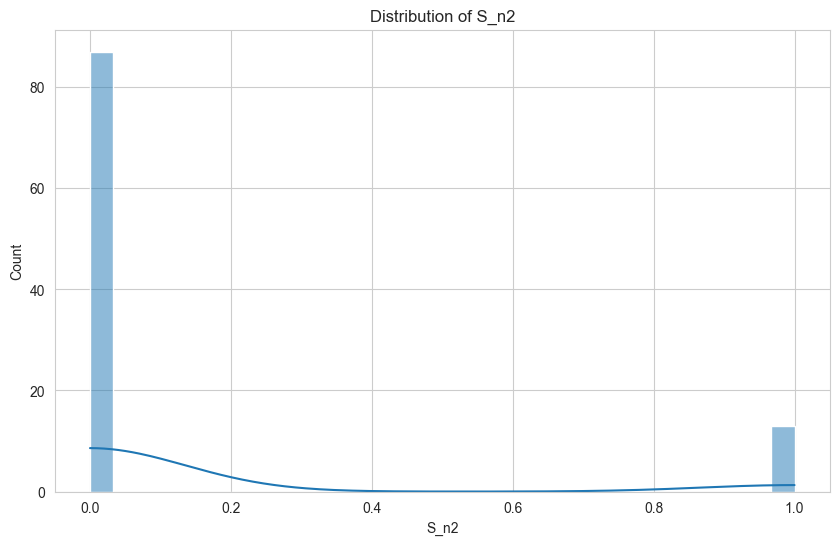

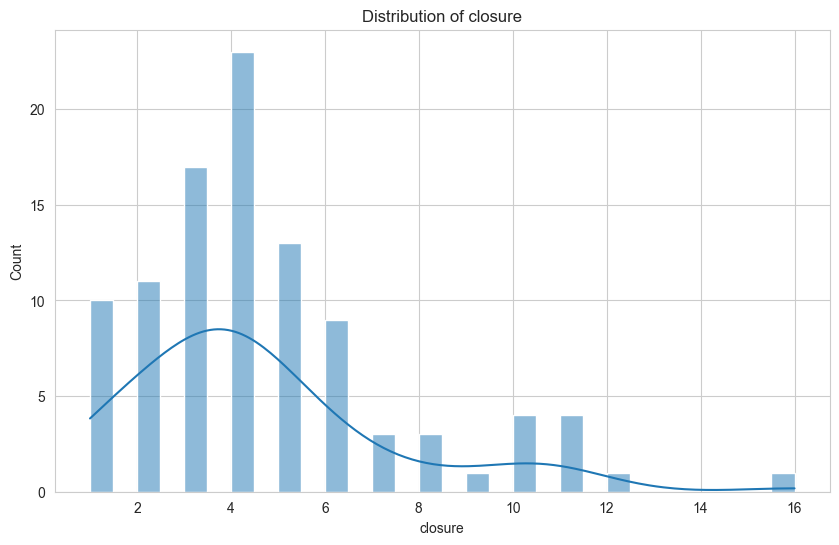

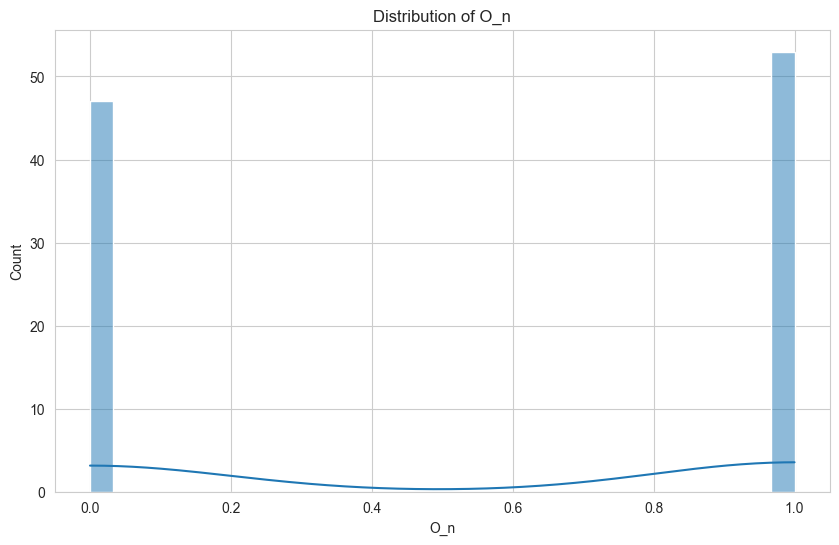

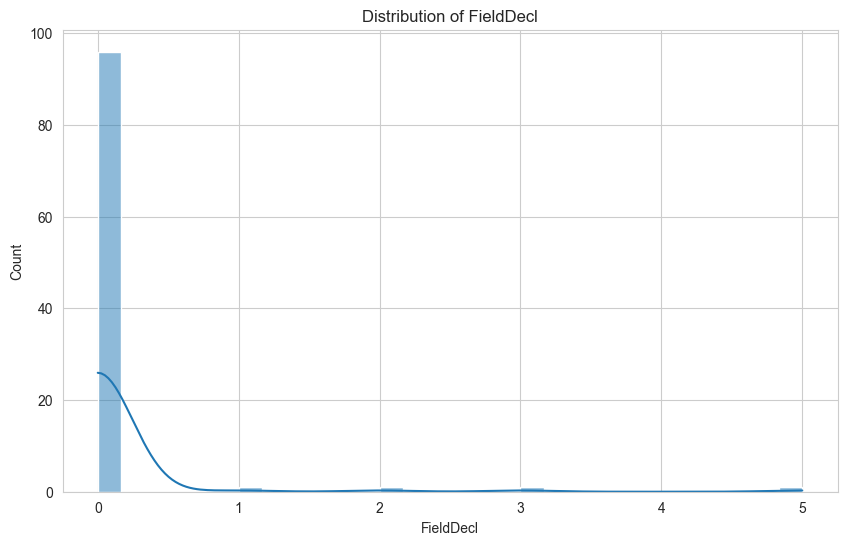

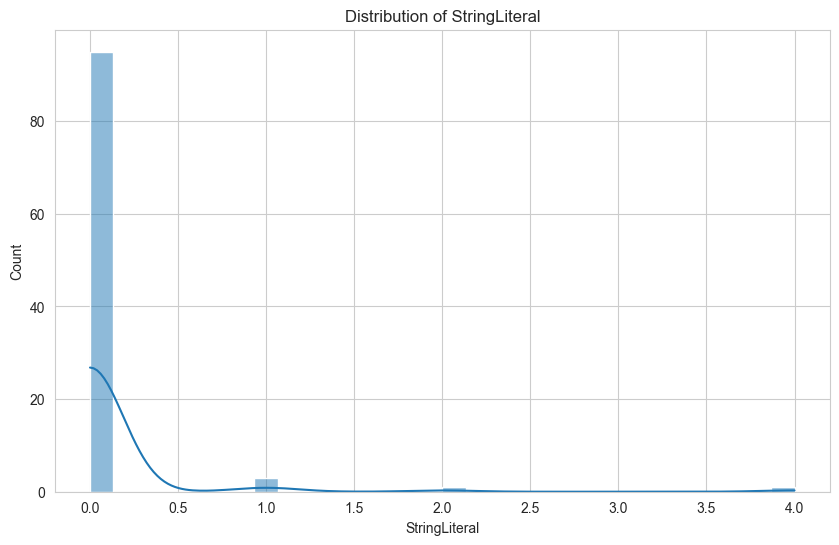

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['Time'], bins=30, kde=True)
plt.title('Distribution of Execution Time')
plt.show()

# Plot distribution of selected features
for feature in top_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()
